<a href="https://colab.research.google.com/github/Taejin1221/Lab_Experiment/blob/main/Trajectory_Clustering/Trajectory_Clustering_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import modules

In [1]:
import os, cv2, glob, time
import numpy as np
import pandas as pd

'''
If you want to know this file,
refer to https://github.com/smupilab/Trajectory-AE/blob/master/utils/convertImage.py
'''
import convertImage as utils
import matplotlib.pyplot as plt

In [2]:
os.getcwd()

'c:\\GitHub\\Lab_Experiment\\Trajectory_Clustering'

In [3]:
os.chdir(os.path.join('C:\\', 'Dataset', 'Geolife'))
os.getcwd()
os.listdir()

['Data', 'Results', 'User Guide-1.3.pdf']

In [4]:
os.listdir(os.path.join('C:\\', 'Dataset', 'Geolife'))

['Data', 'Results', 'User Guide-1.3.pdf']

# Set Constants

In [5]:
# Constants
WIDTH, HEIGHT = 256, 256
CROP_WIDTH, CROP_HEIGHT = 32, 32
CROP_IMAGE_NUMBER = (WIDTH // CROP_WIDTH) * (HEIGHT // CROP_HEIGHT)
print( 'Crop image number:', CROP_IMAGE_NUMBER )

EXPERIMENT_DATA = {
    'name' : 'Trajectory_Clusetring',
    'number' : '18',
    'date' : '06-08-2021',
    'description' : '유사 경로 검색 구현 with Many Geolife data\n'
    }

ROOT_DIR = os.getcwd()
os.chdir(ROOT_DIR)

GEOLIFE_DIR = os.path.join('C:\\', 'Dataset', 'Geolife')
DATA_DIR = os.path.join(GEOLIFE_DIR, 'Data')

if ( 'Results' not in os.listdir() ):
    os.mkdir( 'Results' )
RESULT_DIR = os.path.join( ROOT_DIR, 'Results')

plt.gray()

Crop image number: 64


# Load and Preprocessing Data

## Convert CSV to Image

In [6]:
original_images = [ ]
generator = utils.Map2ImageGenerator( WIDTH, HEIGHT, 0 )

prevTime, cnt = time.time(), 0
for directory in list(sorted(os.listdir(DATA_DIR)))[:10]:
    os.chdir( os.path.join( DATA_DIR, directory, 'Trajectory' ) )
    files = glob.glob( '*plt' )

    for i, file in enumerate(files):
        csv_file = pd.read_csv( file, names = [ 'lat', 'long', 'zero', 'alti', 'date_number', 'date_string', 'time'  ] )[6:]
        csv_file.index = range( 0, len( csv_file ) )
        original_images.append( generator.ConvertImage( csv_file ) )
        cnt += 1
        if (cnt % 100 == 0):
            currTime = time.time()
            print(f'count:{cnt}, time: {currTime - prevTime}s')
            prevTime = currTime

print( 'Total number of trajectories:', len( original_images ) )

count:100, time: 41.98687958717346s
count:200, time: 59.93944954872131s
count:300, time: 72.34019136428833s
count:400, time: 55.592228412628174s
count:500, time: 67.80336594581604s
count:600, time: 68.24058103561401s
count:700, time: 58.04219198226929s
count:800, time: 48.873910665512085s
count:900, time: 44.666977643966675s
count:1000, time: 66.50215458869934s
count:1100, time: 46.930591344833374s
count:1200, time: 61.342477560043335s
count:1300, time: 55.60860514640808s
Total number of trajectories: 1385


In [7]:
os.chdir( DATA_DIR )
if ( 'Image_Files' not in os.listdir() ):
    os.mkdir( 'Image_Files' )
os.chdir( 'Image_Files' )

prevTime = time.time()
num = 0
for img in original_images:
    file_name = f'Geolife_trajectory{num}.png'
    cv2.imwrite( file_name, img )
    
    num += 1
    
    if (num % 100 == 0):
        currTime = time.time()
        print(f'{file_name} time: {currTime - prevTime}s')
        prevTime = currTime

Geolife_trajectory99.png time: 0.17183470726013184s
Geolife_trajectory199.png time: 0.1274569034576416s
Geolife_trajectory299.png time: 0.12497091293334961s
Geolife_trajectory399.png time: 0.14059209823608398s
Geolife_trajectory499.png time: 0.1249704360961914s
Geolife_trajectory599.png time: 0.12497091293334961s
Geolife_trajectory699.png time: 0.14059209823608398s
Geolife_trajectory799.png time: 0.12547683715820312s
Geolife_trajectory899.png time: 0.11065149307250977s
Geolife_trajectory999.png time: 0.1249704360961914s
Geolife_trajectory1099.png time: 0.12497115135192871s
Geolife_trajectory1199.png time: 0.12497067451477051s
Geolife_trajectory1299.png time: 0.10934972763061523s


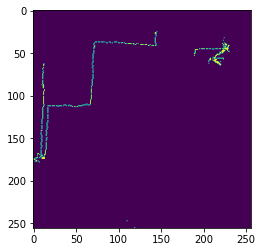

In [8]:
plt.imshow( original_images[0] )
plt.show()

## Crop Image

In [9]:
cnt = 0
cropped_images_train = [ ]
prevTime = time.time()
for image in original_images:
    for i in range( 0, HEIGHT, CROP_HEIGHT ):
        for j in range( 0, WIDTH, CROP_WIDTH ):
            curr_image = [ ]
            for ii in range( i, i + CROP_HEIGHT ):
                curr_image.append( image[ii][j : j + CROP_WIDTH] )
            cropped_images_train.append( curr_image )
    cnt += 1
    if (cnt % 100 == 0):
        currTime = time.time()
        print(f'count: {cnt}, time: {currTime - prevTime}')
        prevTime = currTime

count: 100, time: 0.11539387702941895
count: 200, time: 0.09017181396484375
count: 300, time: 0.09372806549072266
count: 400, time: 0.09372830390930176
count: 500, time: 0.1249704360961914
count: 600, time: 0.09372830390930176
count: 700, time: 0.09372830390930176
count: 800, time: 0.10934925079345703
count: 900, time: 0.09372782707214355
count: 1000, time: 0.09372854232788086
count: 1100, time: 0.09372758865356445
count: 1200, time: 0.09372830390930176
count: 1300, time: 0.09372806549072266


<ipython-input-10-dd83b0f24c71>:2: MatplotlibDeprecationWarning: Passing the sharex parameter of subplots() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  fig, ax = plt.subplots( row, col, True, True, figsize = ( 64, 64 ) )


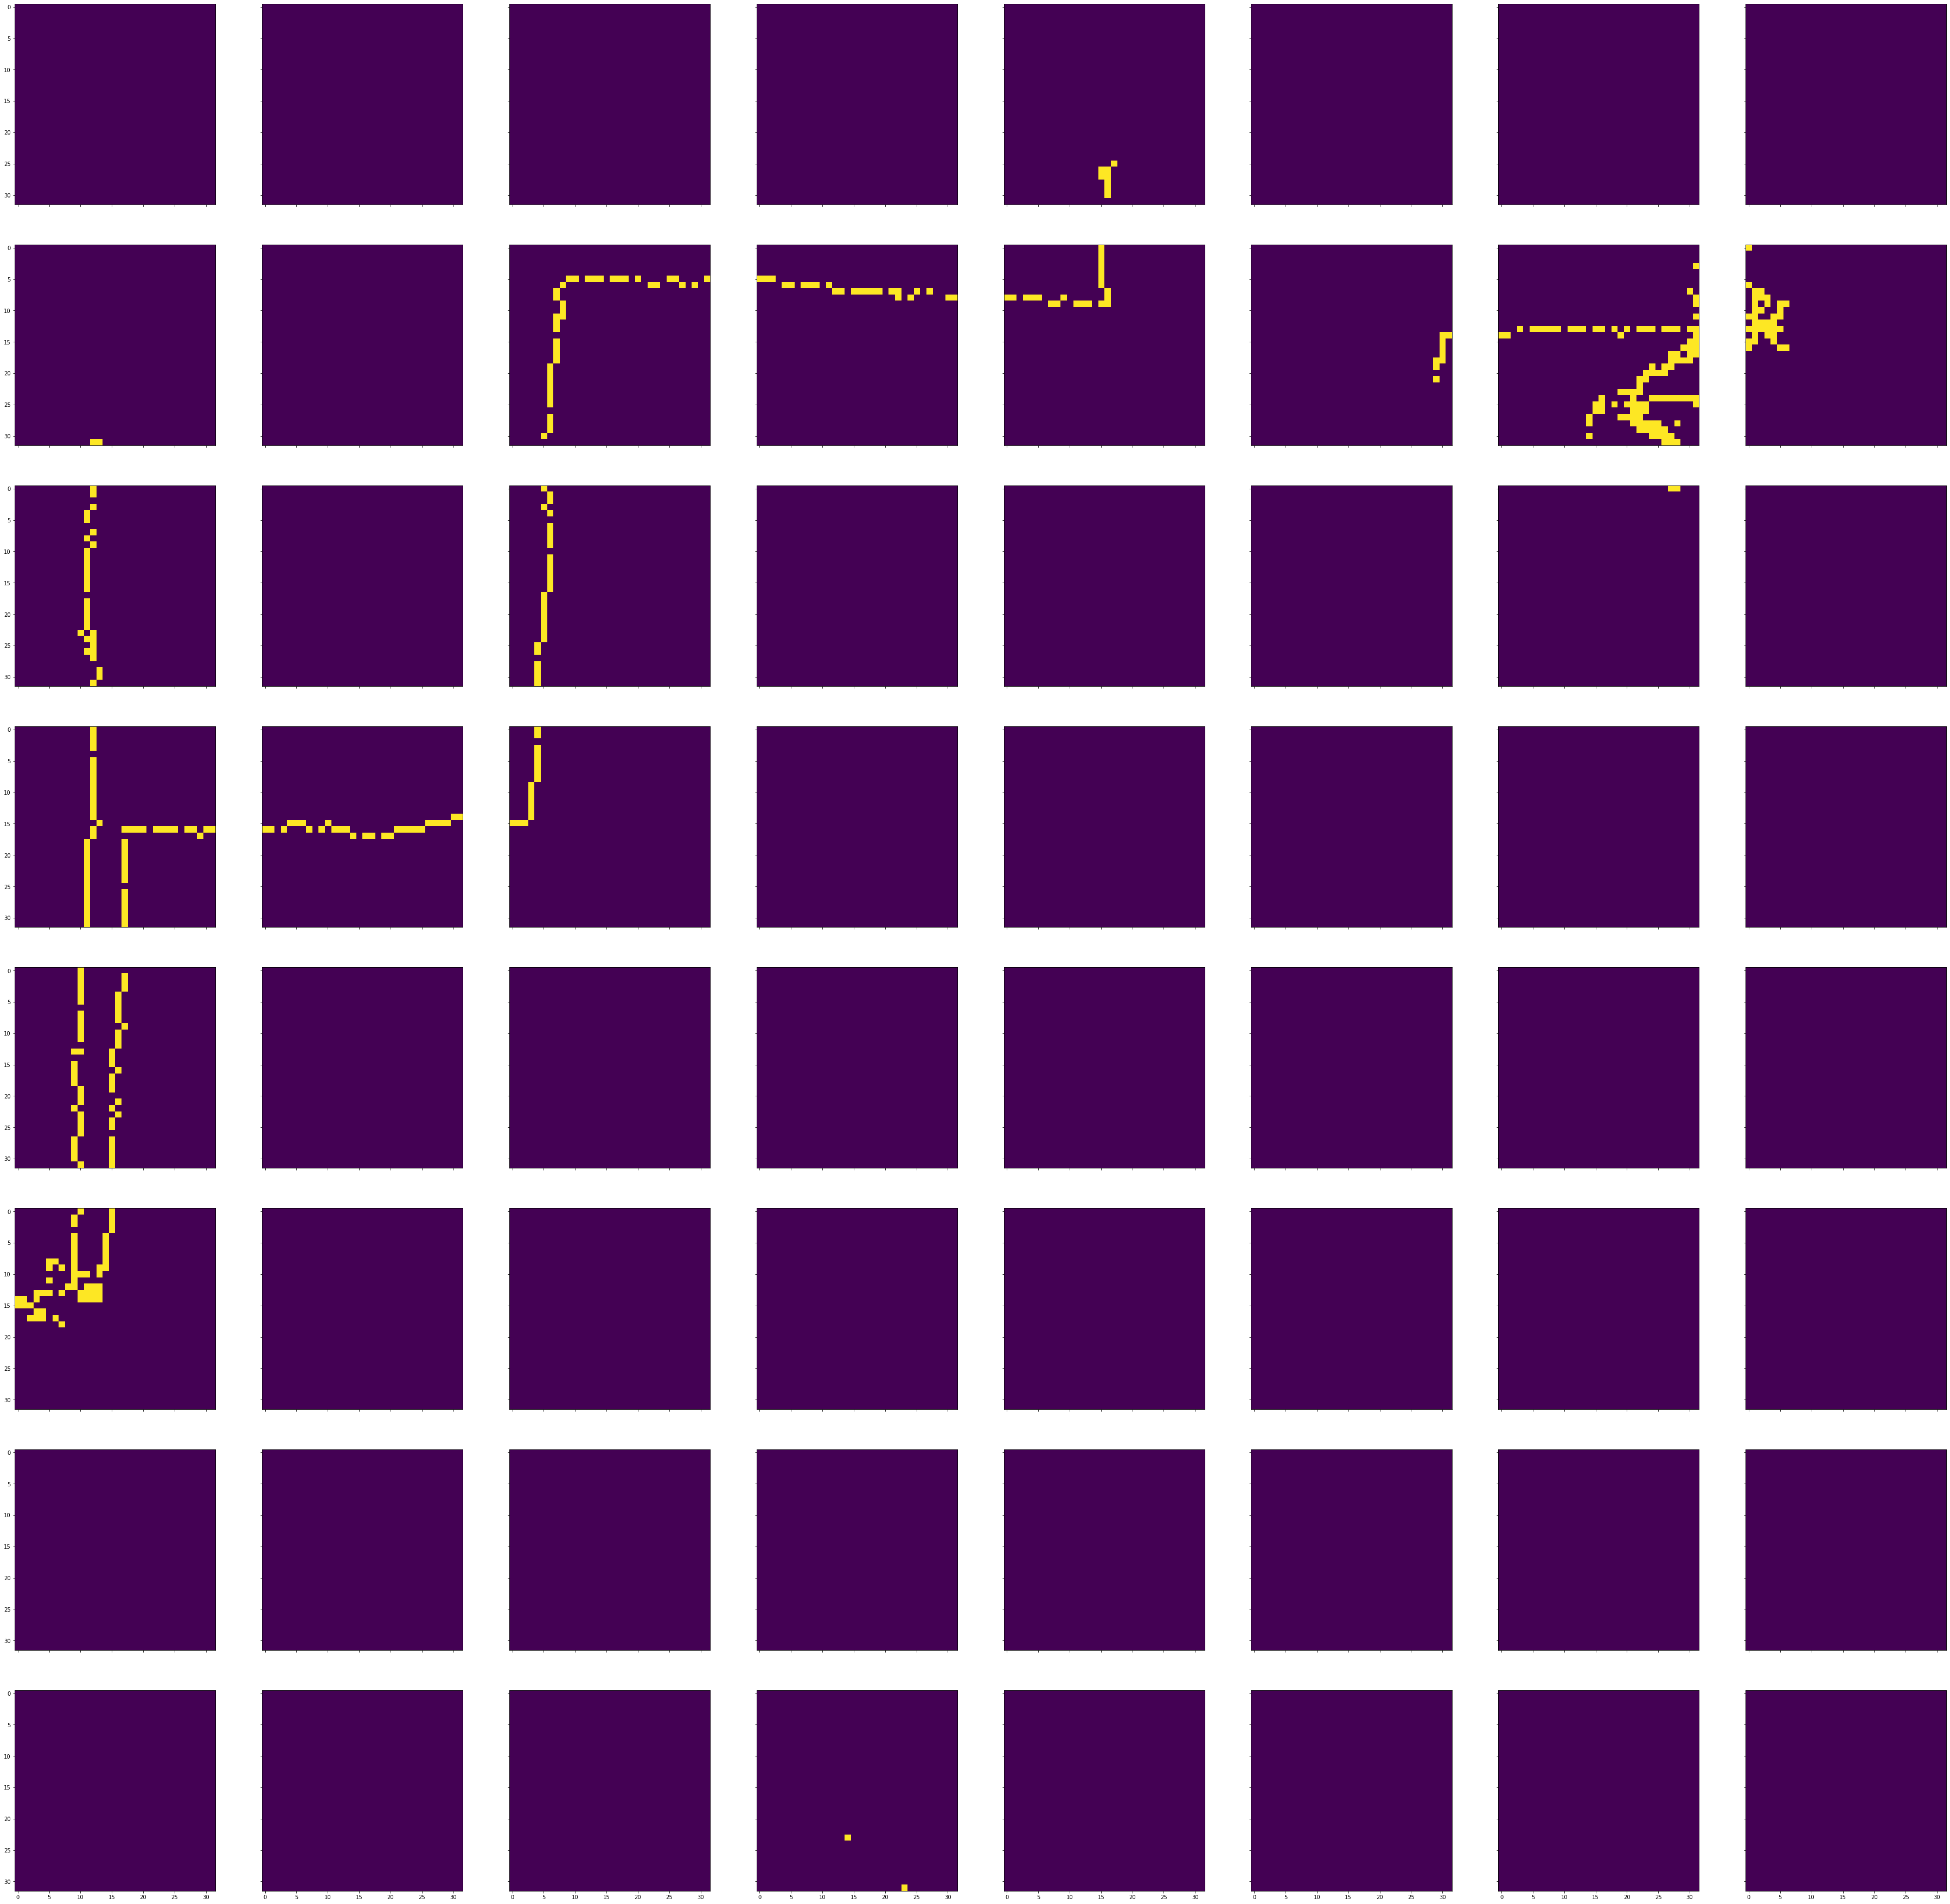

In [10]:
row, col = HEIGHT // CROP_HEIGHT, WIDTH // CROP_WIDTH
fig, ax = plt.subplots( row, col, True, True, figsize = ( 64, 64 ) )
for i in range( row * col ):
    ax[i // row][i % col].imshow( cropped_images_train[i] )
plt.show()

In [11]:
print( len(cropped_images_train) )

88640


In [12]:
X_train = np.array( cropped_images_train ).astype( 'float32' ) / 255.
X_train = np.reshape( X_train, ( -1, CROP_HEIGHT, CROP_WIDTH, 1 ) )

In [13]:
print( X_train.shape )

(88640, 32, 32, 1)


# Construct AE Model

In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [15]:
af, pd = 'relu', 'same' # activation function and padding value

encode_input = layers.Input( ( CROP_HEIGHT, CROP_WIDTH, 1 ) )
x = layers.Conv2D( 32, ( 3, 3 ), activation = af, padding = pd )( encode_input )
x = layers.MaxPooling2D( ( 2, 2 ), padding = pd )( x )

x = layers.Conv2D( 32, ( 3, 3 ), activation = af, padding = pd )( x )
x = layers.MaxPooling2D( ( 2, 2 ), padding = pd )( x )

x = layers.Conv2D( 16, ( 3, 3 ), activation = af, padding = pd )( x )
x = layers.MaxPooling2D( ( 2, 2 ), padding = pd )( x )

x = layers.Conv2D( 16, ( 3, 3 ), activation = af, padding = pd )( x )
x = layers.MaxPooling2D( ( 2, 2 ), padding = pd )( x )

feature_map_shape = x.shape
flatten_size = feature_map_shape[1] * feature_map_shape[2] * feature_map_shape[3]

x = layers.Flatten()( x )
encode_output = layers.Dense( flatten_size , activation = af )( x )

In [16]:
encoder = keras.Model( encode_input, encode_output, name = 'Encoder' )
encoder.summary()

Model: "Encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 16)          4624      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 16)          0   

In [17]:
decode_input = layers.Input( ( flatten_size ) )

x = layers.Dense( flatten_size, activation = af )( decode_input )
x = layers.Reshape( feature_map_shape[1:] )( x )

x = layers.Conv2DTranspose( 16, ( 3, 3 ), activation = af, padding = pd )( x )
x = layers.UpSampling2D( ( 2, 2 ) )( x )

x = layers.Conv2DTranspose( 16, ( 3, 3 ), activation = af, padding = pd )( x )
x = layers.UpSampling2D( ( 2, 2 ) )( x )

x = layers.Conv2DTranspose( 32, ( 3, 3 ), activation = af, padding = pd )( x )
x = layers.UpSampling2D( ( 2, 2 ) )( x )

x = layers.Conv2DTranspose( 32, ( 3, 3 ), activation = af, padding = pd )( x )
x = layers.UpSampling2D( ( 2, 2 ) )( x )

decode_output = layers.Conv2DTranspose( 1, ( 3, 3 ), activation = af, padding = pd )( x )

In [18]:
decoder = keras.Model( decode_input, decode_output, name = 'Decoder' )
decoder.summary()

Model: "Decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 64)]              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
reshape (Reshape)            (None, 2, 2, 16)          0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 2, 2, 16)          2320      
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 4, 4, 16)          0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 4, 4, 16)          2320      
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 8, 8, 16)          0   

In [19]:
auto_encoder = keras.Model( encode_input, decoder( encoder( encode_input ) ), name = 'Auto_Encoder' )
auto_encoder.summary()

Model: "Auto_Encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 1)]       0         
_________________________________________________________________
Encoder (Functional)         (None, 64)                20672     
_________________________________________________________________
Decoder (Functional)         (None, 32, 32, 1)         22977     
Total params: 43,649
Trainable params: 43,649
Non-trainable params: 0
_________________________________________________________________


# Traing Model

In [20]:
LAMBDA1, LAMBDA2 = 0.15, 0.85

def SSIM_Loss( y_true, y_pred ):
    ssim = tf.image.ssim( y_true, y_pred, max_val = 1.0, filter_size = 11,
                          filter_sigma = 1.5, k1 = 0.01, k2 = 0.03)
    
    return 1 - tf.reduce_mean( ssim )

def Hybrid_Loss( y_true, y_pred ):
    f1 = keras.losses.MAE( y_true, y_pred )
    f2 = SSIM_Loss( y_true, y_pred )

    return LAMBDA1 * f1 + LAMBDA2 * f2

# auto_encoder.compile( 'adam', loss = Hybrid_Loss )
auto_encoder.compile( 'adam', loss = 'mse' )

In [21]:
EPOCH = 300
BATCH = 128

In [22]:
history = auto_encoder.fit( X_train, X_train, epochs = EPOCH, batch_size = BATCH  )

Epoch 1/300
693/693 [==============================] - 12s 8ms/step - loss: 0.0061
Epoch 2/300
693/693 [==============================] - 5s 8ms/step - loss: 0.0056
Epoch 3/300
693/693 [==============================] - 5s 8ms/step - loss: 0.0054
Epoch 4/300
693/693 [==============================] - 5s 8ms/step - loss: 0.0053
Epoch 5/300
693/693 [==============================] - 5s 8ms/step - loss: 0.0052
Epoch 6/300
693/693 [==============================] - 5s 8ms/step - loss: 0.0051
Epoch 7/300
693/693 [==============================] - 5s 8ms/step - loss: 0.0051
Epoch 8/300
693/693 [==============================] - 5s 8ms/step - loss: 0.0050
Epoch 9/300
693/693 [==============================] - 5s 8ms/step - loss: 0.0050
Epoch 10/300
693/693 [==============================] - 5s 8ms/step - loss: 0.0049
Epoch 11/300
693/693 [==============================] - 5s 8ms/step - loss: 0.0049
Epoch 12/300
693/693 [==============================] - 5s 8ms/step - loss: 0.0048
Epoch 13/300

# Test Model

In [23]:
os.chdir( RESULT_DIR )

new_result_dir = f"{EXPERIMENT_DATA['name']}_{EXPERIMENT_DATA['number']}_{EXPERIMENT_DATA['date']}_Datas"
os.mkdir( new_result_dir )
os.chdir( new_result_dir )

encoder.save('encoder.h5')
auto_encoder.save('auto_encoder.h5')

with open( 'Description.txt', 'w' ) as f:
    f.write( EXPERIMENT_DATA['description'] )

## Check Reconstruction

<ipython-input-25-dc978cf7323c>:7: MatplotlibDeprecationWarning: Passing the sharex parameter of subplots() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  fig, ax = plt.subplots( row, 2 * col, True, True, figsize = ( 64, 32 ) )


Trajectory_Clusetring_18_Reconstruction(06-08-2021).png


<Figure size 432x288 with 0 Axes>

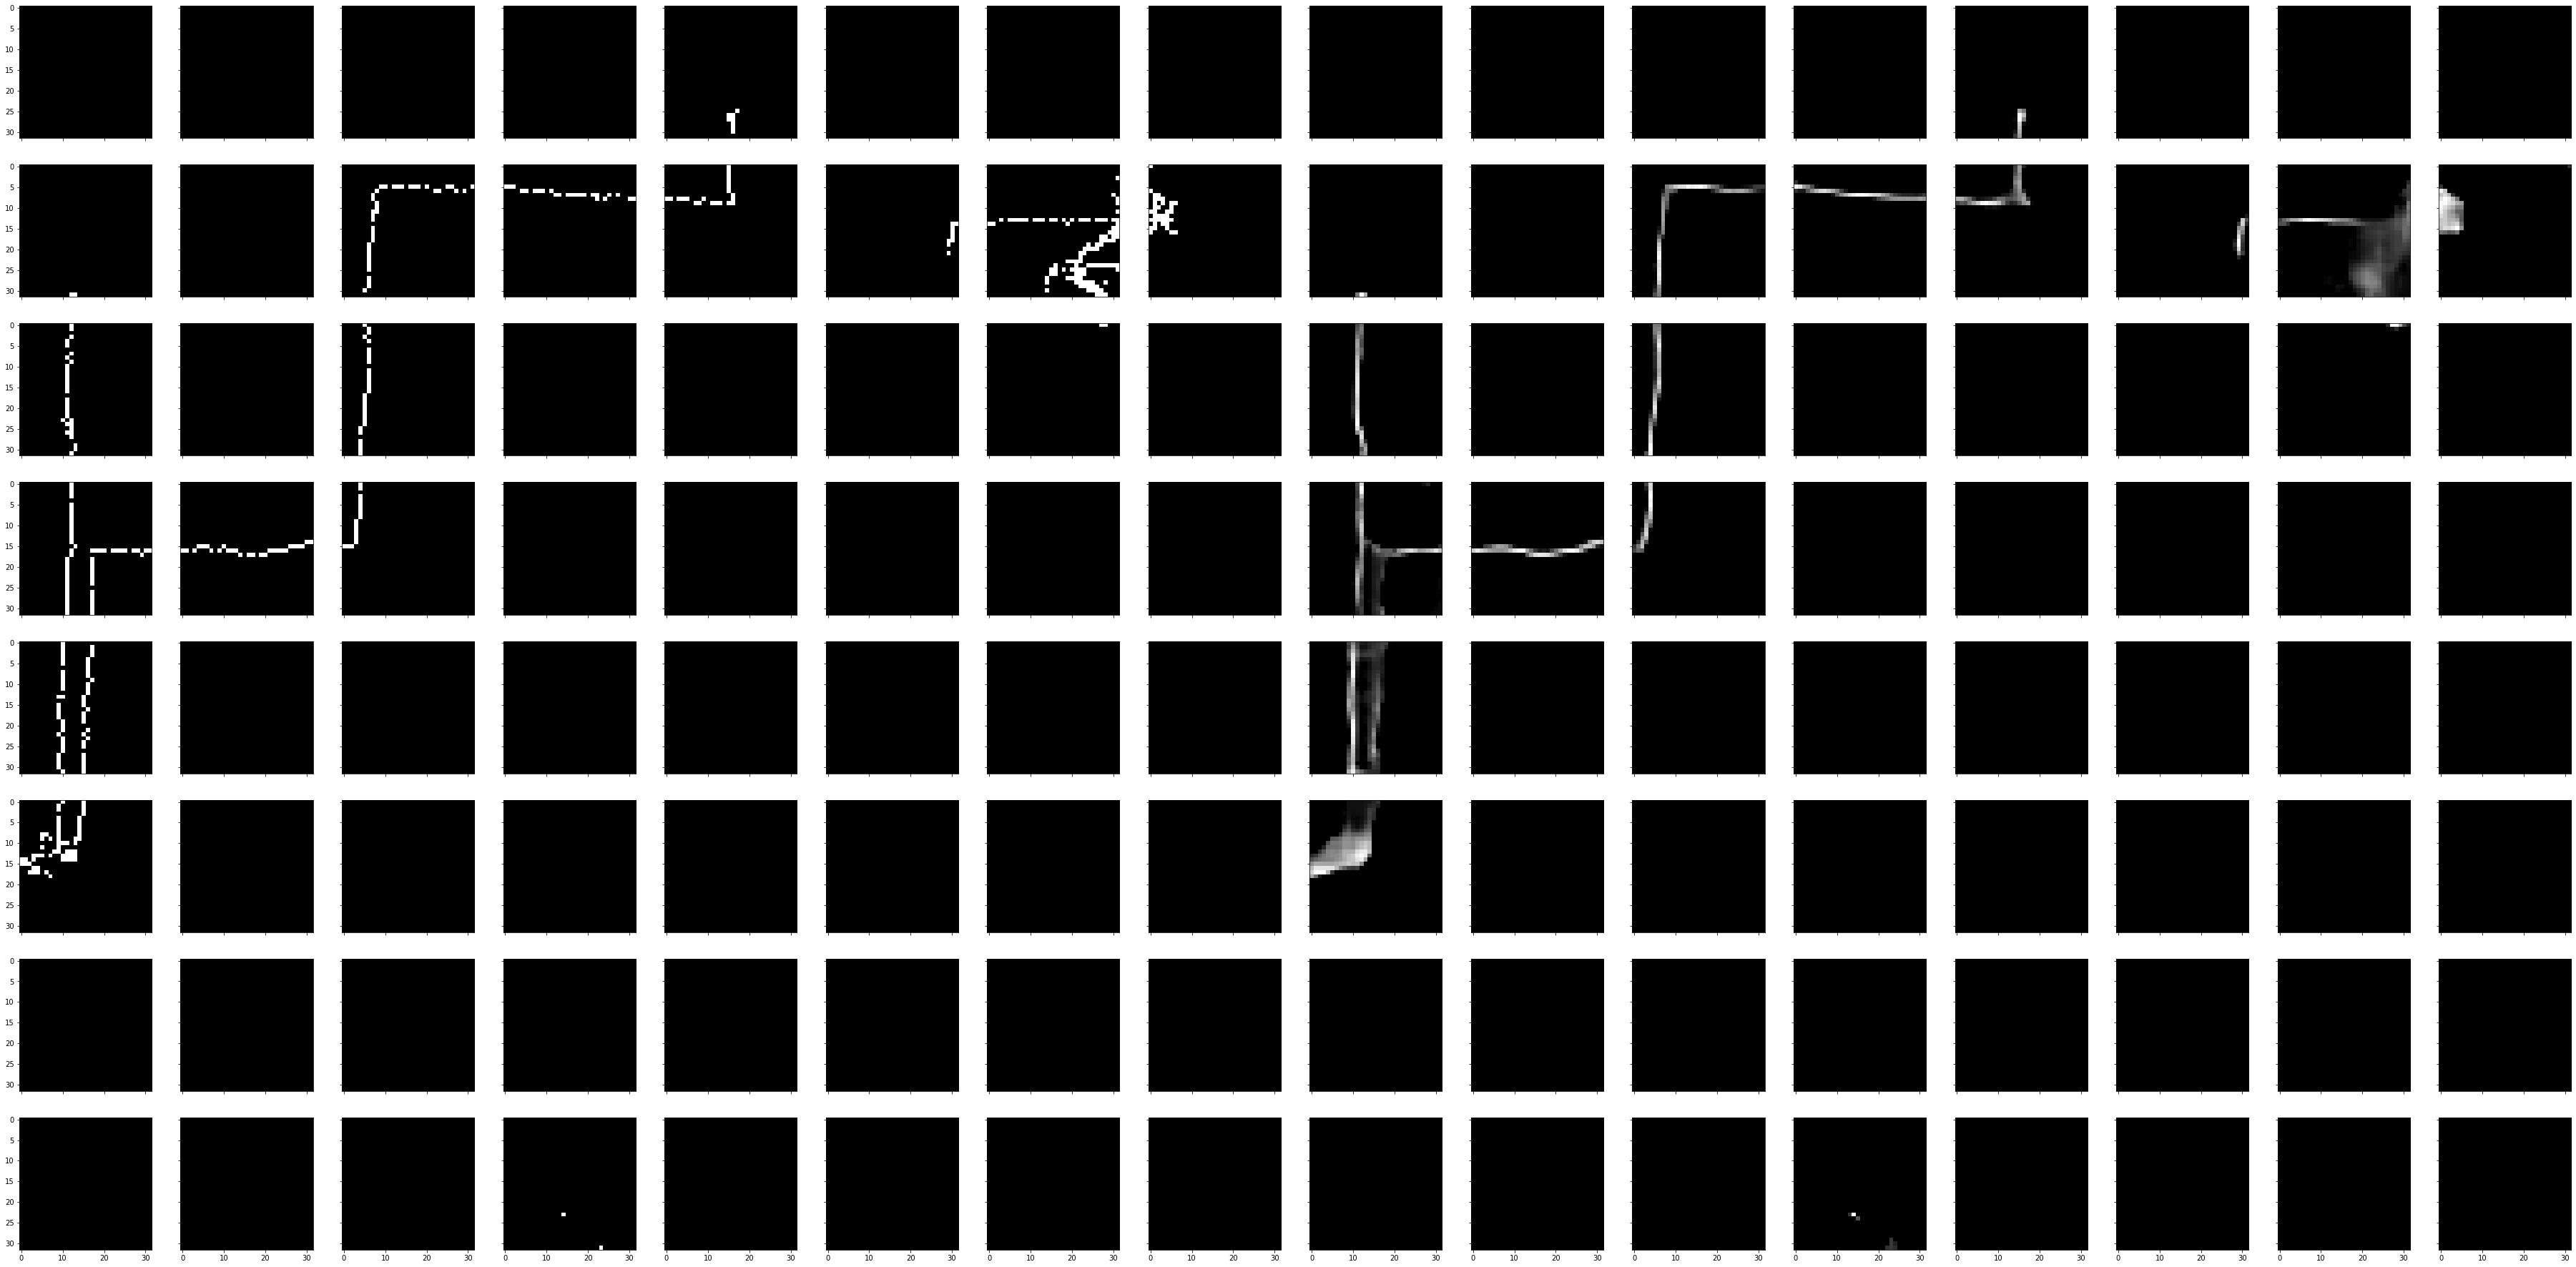

In [25]:
decoded_img = auto_encoder( X_train[:CROP_IMAGE_NUMBER] )

plt.gray()

row, col = HEIGHT // CROP_HEIGHT, WIDTH // CROP_WIDTH
n = row * col
fig, ax = plt.subplots( row, 2 * col, True, True, figsize = ( 64, 32 ) )
for i in range( n ):
    ax[i // 8][i % 8].imshow( X_train[i].reshape( CROP_HEIGHT, CROP_WIDTH ) )
    ax[i // 8][i % 8 + 8].imshow( tf.reshape( decoded_img[i], ( CROP_HEIGHT, CROP_WIDTH ) ) )

result_name = (EXPERIMENT_DATA['name'] + '_'
    + EXPERIMENT_DATA['number'] + '_'
    + 'Reconstruction' + '('
    + EXPERIMENT_DATA['date'] + ').png')
print( result_name )

plt.savefig( result_name, dpi = 100 )
plt.show()

## Calculate Cosine Similarity

In [44]:
# Cosine Similarity
from scipy.spatial import distance

thresholds = [ 0.15, 0.2, 0.25, 0.3 ]
low_dimension_data, prevIdx = [ ], 0
for i in range(0, len(X_train), 10_000):
    low_dimension_data.extend(encoder(X_train[prevIdx:i]))
    prevIdx = i
low_dimension_data.extend(encoder(X_train[prevIdx:]))

low_dimension_data = np.array(low_dimension_data)
print(X_train.shape)
print(low_dimension_data.shape)

(88640, 32, 32, 1)
(88640, 64)


Similar path number(thre:0.10): 1


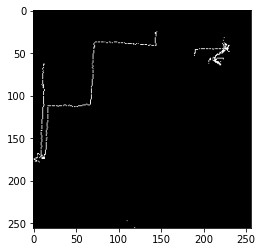

Similar path number(thre:0.20): 86


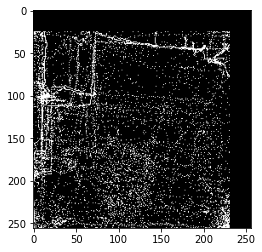

Similar path number(thre:0.30): 1385


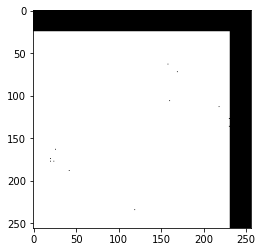

In [45]:
thresholds = [0.1, 0.2, 0.3]
for threshold in thresholds:
    same_trajectory_idx = [ 0 ]

    for compare_idx in range( 1, len( X_train ) // CROP_IMAGE_NUMBER ):
        cnt = 0
        for i, j in zip( range( 0, 64 ), range( compare_idx * CROP_IMAGE_NUMBER, (compare_idx + 1) * CROP_IMAGE_NUMBER ) ):
            dist = distance.cosine( low_dimension_data[i], low_dimension_data[j] )
            if ( dist < threshold ):
                cnt += 1

        if ( cnt > 50 ):
            same_trajectory_idx.append( compare_idx )
    
    origin_X_train = X_train.reshape( -1, CROP_HEIGHT, CROP_WIDTH )

    one_image = [ [ 0 for _ in range( WIDTH ) ] for _ in range( HEIGHT ) ]
    stack_image = [ [ 0 for _ in range( WIDTH ) ] for _ in range( HEIGHT ) ]

    for idx in same_trajectory_idx:
        for idx64 in range( idx * CROP_IMAGE_NUMBER, (idx + 1) * CROP_IMAGE_NUMBER ):
            image = origin_X_train[idx64]
            for i in range( CROP_HEIGHT ):
                for j in range( CROP_WIDTH ):
                    if ( image[i][j] > 0 ):
                        converted_row = ((idx64 % CROP_IMAGE_NUMBER) // 8) * CROP_HEIGHT + i
                        converted_col = ((idx64 % CROP_IMAGE_NUMBER) % 8) * CROP_WIDTH + j
                        one_image[converted_row][converted_col] = 255
                        stack_image[converted_row][converted_col] += 1
    
    print( f'Similar path number(threshold:{threshold:.2f}):', len( same_trajectory_idx ) )
    
    plt.gray()
    plt.imshow( one_image )

    plt.savefig( f'Search_Result_{threshold:.2f}.png', dpi = 100 )
    plt.show()